# Model Comparison
## Find the Best Model



In [372]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from glob import glob
from collections import Counter, namedtuple
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [373]:
!pwd

/Users/chris/github/reddit_nlp


In [374]:
# === TODO === #
# use postgres to store and retrieve the compare df rows

In [376]:
reports = glob('data/compare_df/*.csv')
reports

['data/compare_df/2020-05-10_1333.csv',
 'data/compare_df/2020-05-09_1844.csv',
 'data/compare_df/2020-05-10_1320.csv',
 'data/compare_df/2020-05-10_1337.csv',
 'data/compare_df/2020-05-09_1940.csv',
 'data/compare_df/2020-05-09_1607.csv',
 'data/compare_df/2020-05-10_1353.csv',
 'data/compare_df/2020-05-10_1424.csv',
 'data/compare_df/2020-05-09_1428.csv',
 'data/compare_df/2020-05-09_0938.csv',
 'data/compare_df/2020-05-09_1746.csv',
 'data/compare_df/2020-05-10_1403.csv',
 'data/compare_df/2020-05-10_1404.csv']

In [377]:
df = pd.DataFrame()

In [378]:
for report in reports:
    data = pd.read_csv(report)
    df = df.append(data)
    

data/compare_df/2020-05-10_1333.csv
data/compare_df/2020-05-09_1844.csv
data/compare_df/2020-05-10_1320.csv
data/compare_df/2020-05-10_1337.csv
data/compare_df/2020-05-09_1940.csv
data/compare_df/2020-05-09_1607.csv
data/compare_df/2020-05-10_1353.csv
data/compare_df/2020-05-10_1424.csv
data/compare_df/2020-05-09_1428.csv
data/compare_df/2020-05-09_0938.csv
data/compare_df/2020-05-09_1746.csv
data/compare_df/2020-05-10_1403.csv
data/compare_df/2020-05-10_1404.csv


In [379]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head(10)

,preprocessor,estimator,best_train_score,best_test_score,time_weighted_score,roc_auc,train_test_variance,fit_time_seconds,predict_time_seconds,best_params,subreddits,date
0,TfidfVectorizer,XGBoost Classifier,0.540,0.451,56.954,0.817,0.165,7.854,0.057,"{'xgbclassifier__n_estimators': 50, 'xgbclassi...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
1,TfidfVectorizer,MLPClassifier,0.162,0.163,46.355,0.805,-0.007,3.480,0.043,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
2,TfidfVectorizer,Logistic Regression,0.595,0.492,2934.932,0.839,0.173,0.148,0.020,"{'tfidfvectorizer__use_idf': True, 'tfidfvecto...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
3,TfidfVectorizer,Random Forest,0.287,0.270,768.463,0.812,0.062,0.301,0.049,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
4,TfidfVectorizer,K Nearest Neighbors,0.369,0.181,422.500,0.555,0.511,0.078,0.350,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
5,TfidfVectorizer,Multinomial Bayes Classifier,0.826,0.547,5815.579,0.885,0.337,0.072,0.023,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
6,TfidfVectorizer,Support Vector Classifier,0.569,0.509,221.333,0.885,0.104,1.857,0.444,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
7,TfidfVectorizer,AdaBoost Classifier,0.266,0.254,613.609,0.612,0.046,0.360,0.053,"{'tfidfvectorizer__use_idf': True, 'tfidfvecto...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
8,TfidfVectorizer,Bagging Classifier Logistic Regression,0.599,0.501,15.091,0.856,0.163,33.112,0.089,"{'tfidfvectorizer__use_idf': True, 'tfidfvecto...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999
9,TfidfVectorizer,Bagging Classifier,0.774,0.446,46.036,0.805,0.424,9.406,0.274,"{'tfidfvectorizer__use_idf': False, 'tfidfvect...","deeplearning, html, sql, learnsql, apachespark...",2020-05-10 13:33:11.480999


In [380]:
columns_of_interest = ['preprocessor','estimator','best_test_score', 'roc_auc', 'fit_time_seconds','time_weighted_score']

In [381]:
df.sort_values(by='time_weighted_score', ascending=False)[columns_of_interest]

,preprocessor,estimator,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
5,TfidfVectorizer,Multinomial Bayes Classifier,0.757,0.927,0.072,8279.138
5,TfidfVectorizer,Multinomial Bayes Classifier,0.642,0.884,0.062,8035.758
5,TfidfVectorizer,Multinomial Bayes Classifier,0.670,0.896,0.068,7595.064
5,TfidfVectorizer,Multinomial Bayes Classifier,0.684,0.917,0.084,6270.312
5,TfidfVectorizer,Multinomial Bayes Classifier,0.659,0.900,0.086,5918.478
...,...,...,...,...,...,...
8,TfidfVectorizer,Bagging Classifier Logistic Regression,0.675,0.894,135.621,4.968
8,TfidfVectorizer,Bagging Classifier Logistic Regression,0.608,0.887,123.963,4.895
7,TfidVectorizer,Bagging Classifier Logistic Regression,0.622,0.900,175.725,3.535
11,TfidfVectorizer,Gradient Boosting Classifier,0.725,0.880,501.250,1.435


In [382]:
df.sort_values(by='best_test_score', ascending=False)[columns_of_interest]

,preprocessor,estimator,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
14,TfidfVectorizer,Linear SVC,0.759,0.880,0.317,2245.237
5,TfidfVectorizer,Multinomial Bayes Classifier,0.757,0.927,0.072,8279.138
12,TfidfVectorizer,Passive Agressive Classifier,0.753,0.880,0.257,2617.406
8,TfidfVectorizer,Bagging Classifier Logistic Regression,0.751,0.928,50.706,14.776
2,TfidfVectorizer,Logistic Regression,0.740,0.919,0.261,2526.104
...,...,...,...,...,...,...
4,TfidfVectorizer,K Nearest Neighbors,0.181,0.555,0.078,422.500
1,TfidfVectorizer,MLPClassifier,0.163,0.805,3.480,46.355
12,TfidfVectorizer,Stochastic Gradient Descent Classifier,0.149,0.871,0.183,700.919
12,TfidfVectorizer,Stochastic Gradient Descent Classifier,0.103,0.831,0.120,691.962


In [385]:
df.groupby(by='estimator')[columns_of_interest].agg(np.mean).sort_values(by='best_test_score', ascending=False)

# [columns_of_interest].mean()

,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Multinomial Bayes Classifier,0.643538,0.889615,0.114308,5190.303077
Bagging Classifier Logistic Regression,0.643000,0.897538,78.708769,10.476923
Extra Trees Classifier,0.633615,0.876846,22.685231,35.868231
Linear SVC,0.629615,0.867462,0.250154,2571.582077
Support Vector Classifier,0.629462,0.889615,4.196538,150.025077
Gradient Boosting Classifier,0.625500,0.864000,699.442333,13.996333
Passive Agressive Classifier,0.618538,0.867462,0.247154,2380.624923
Logistic Regression,0.612769,0.887692,0.809077,1543.782769
Multi Layer Percetpron Classifier,0.608000,0.902000,20.830000,29.133000


In [386]:
df.groupby(by='estimator')[columns_of_interest].mean().sort_values(by='best_test_score', ascending=False)



,best_test_score,roc_auc,fit_time_seconds,time_weighted_score
estimator,,,,
Multinomial Bayes Classifier,0.643538,0.889615,0.114308,5190.303077
Bagging Classifier Logistic Regression,0.643000,0.897538,78.708769,10.476923
Extra Trees Classifier,0.633615,0.876846,22.685231,35.868231
Linear SVC,0.629615,0.867462,0.250154,2571.582077
Support Vector Classifier,0.629462,0.889615,4.196538,150.025077
Gradient Boosting Classifier,0.625500,0.864000,699.442333,13.996333
Passive Agressive Classifier,0.618538,0.867462,0.247154,2380.624923
Logistic Regression,0.612769,0.887692,0.809077,1543.782769
Multi Layer Percetpron Classifier,0.608000,0.902000,20.830000,29.133000


# Best Params

In [387]:
params_list = []
params_dict_list = []
params_tuple_list = []
for param_grid in df.best_params:
    for key, value in eval(param_grid).items():
        estimator, parameter = key.split('__')
        params_dict_list.append((estimator, f'{parameter}: {str(value)}'))
        params_list.append([estimator, parameter, value])
        params_tuple_list.append((estimator, parameter, value))

     

In [388]:
counted = dict(Counter(params_tuple_list))

In [389]:
counted

{('xgbclassifier', 'n_estimators', 50): 6,
 ('xgbclassifier', 'max_depth', 5): 4,
 ('xgbclassifier', 'hidden_layer_sizes', 25): 8,
 ('tfidfvectorizer', 'use_idf', True): 94,
 ('tfidfvectorizer', 'strip_accents', 'unicode'): 62,
 ('tfidfvectorizer', 'norm', 'l1'): 84,
 ('tfidfvectorizer', 'ngram_range', (1, 1)): 86,
 ('tfidfvectorizer', 'min_df', 2): 107,
 ('tfidfvectorizer', 'max_features', 6000): 71,
 ('tfidfvectorizer', 'max_df', 0.8): 42,
 ('tfidfvectorizer', 'use_idf', False): 95,
 ('tfidfvectorizer', 'strip_accents', None): 60,
 ('tfidfvectorizer', 'ngram_range', (1, 2)): 103,
 ('tfidfvectorizer', 'min_df', 14): 15,
 ('tfidfvectorizer', 'max_features', 5000): 65,
 ('tfidfvectorizer', 'max_df', 0.895): 31,
 ('mlpclassifier', 'hidden_layer_sizes', (500,)): 3,
 ('mlpclassifier', 'alpha', 0.7500249999999999): 3,
 ('mlpclassifier', 'activation', 'logistic'): 2,
 ('tfidfvectorizer', 'strip_accents', 'ascii'): 67,
 ('logisticregression', 'solver', 'saga'): 8,
 ('logisticregression', 'pen

In [314]:
string_values

[17, 12, 15, 18, 3, 11, 7, 7, 15, 23, 8, 11, 3, 13, 7, 1, 12, 5, 11, 2, 8, 1]

In [369]:
def best_params_plot(estimator, parameter=None):
    
    if parameter is None:
        string_keys = [(f'{key[1]}: {key[2]}') for key in counted.keys() if key[0] == estimator]
        string_values = [value for key, value in counted.items() if key[0] == estimator]
        
        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()}')
        
        sns.barplot(y=string_keys, x=string_values, orient='h');
    
    else:
        string_keys = [(f'Value: {key[2]}') for key in counted.keys() if key[0] == estimator and key[1] == parameter]
        string_values = [value for key, value in counted.items() if key[0] == estimator and key[1] == parameter]

        plt.figure(figsize=(2 * len(string_keys), 2 * len(string_keys)))
        plt.title(f'{estimator.upper()} {parameter.upper()}')

        sns.barplot(y=string_keys, x=string_values, orient='h');


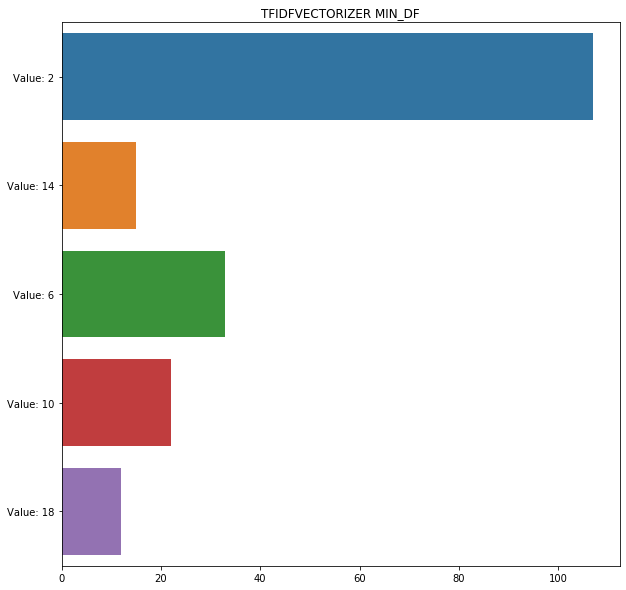

In [390]:
best_params_plot('tfidfvectorizer', 'min_df')

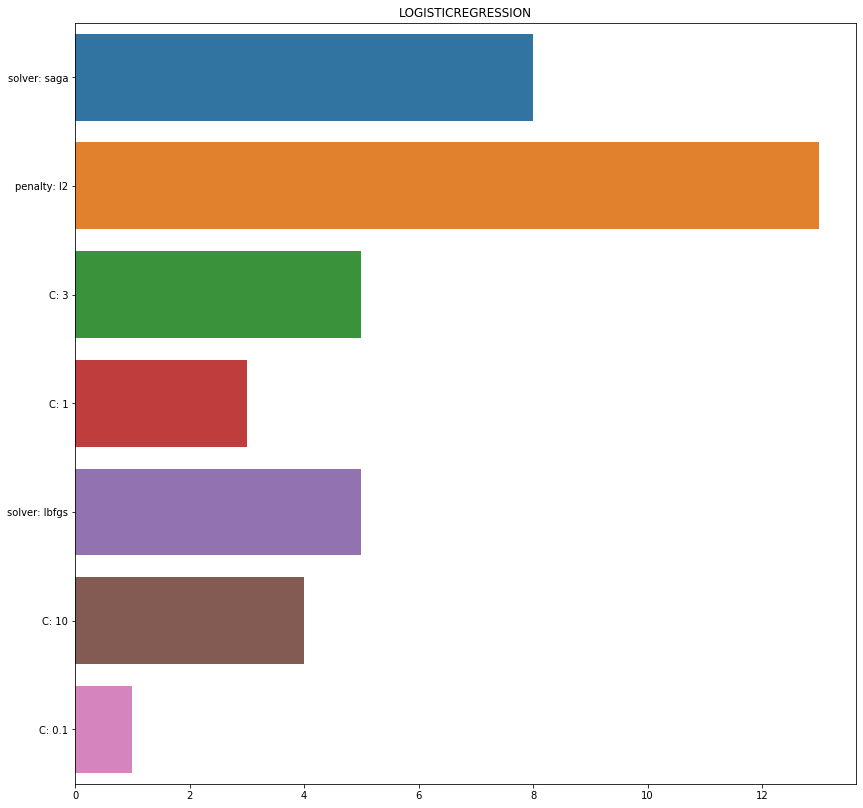

In [392]:
best_params_plot('logisticregression')

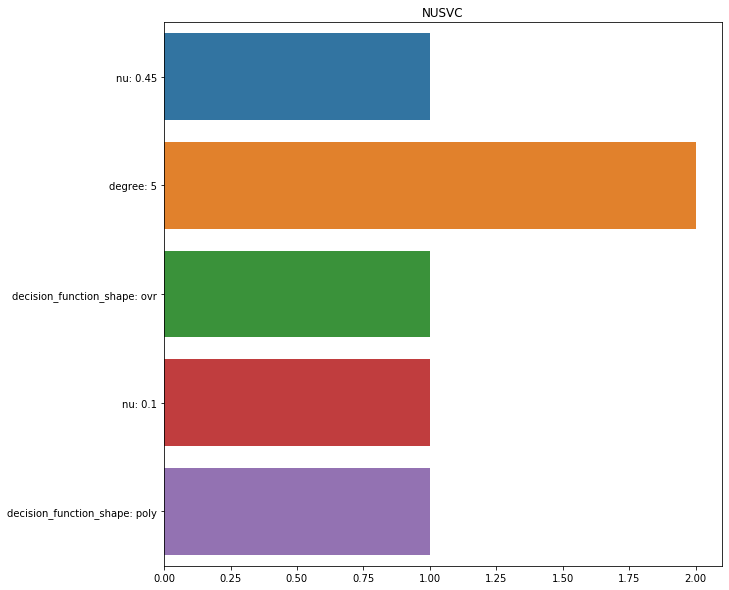

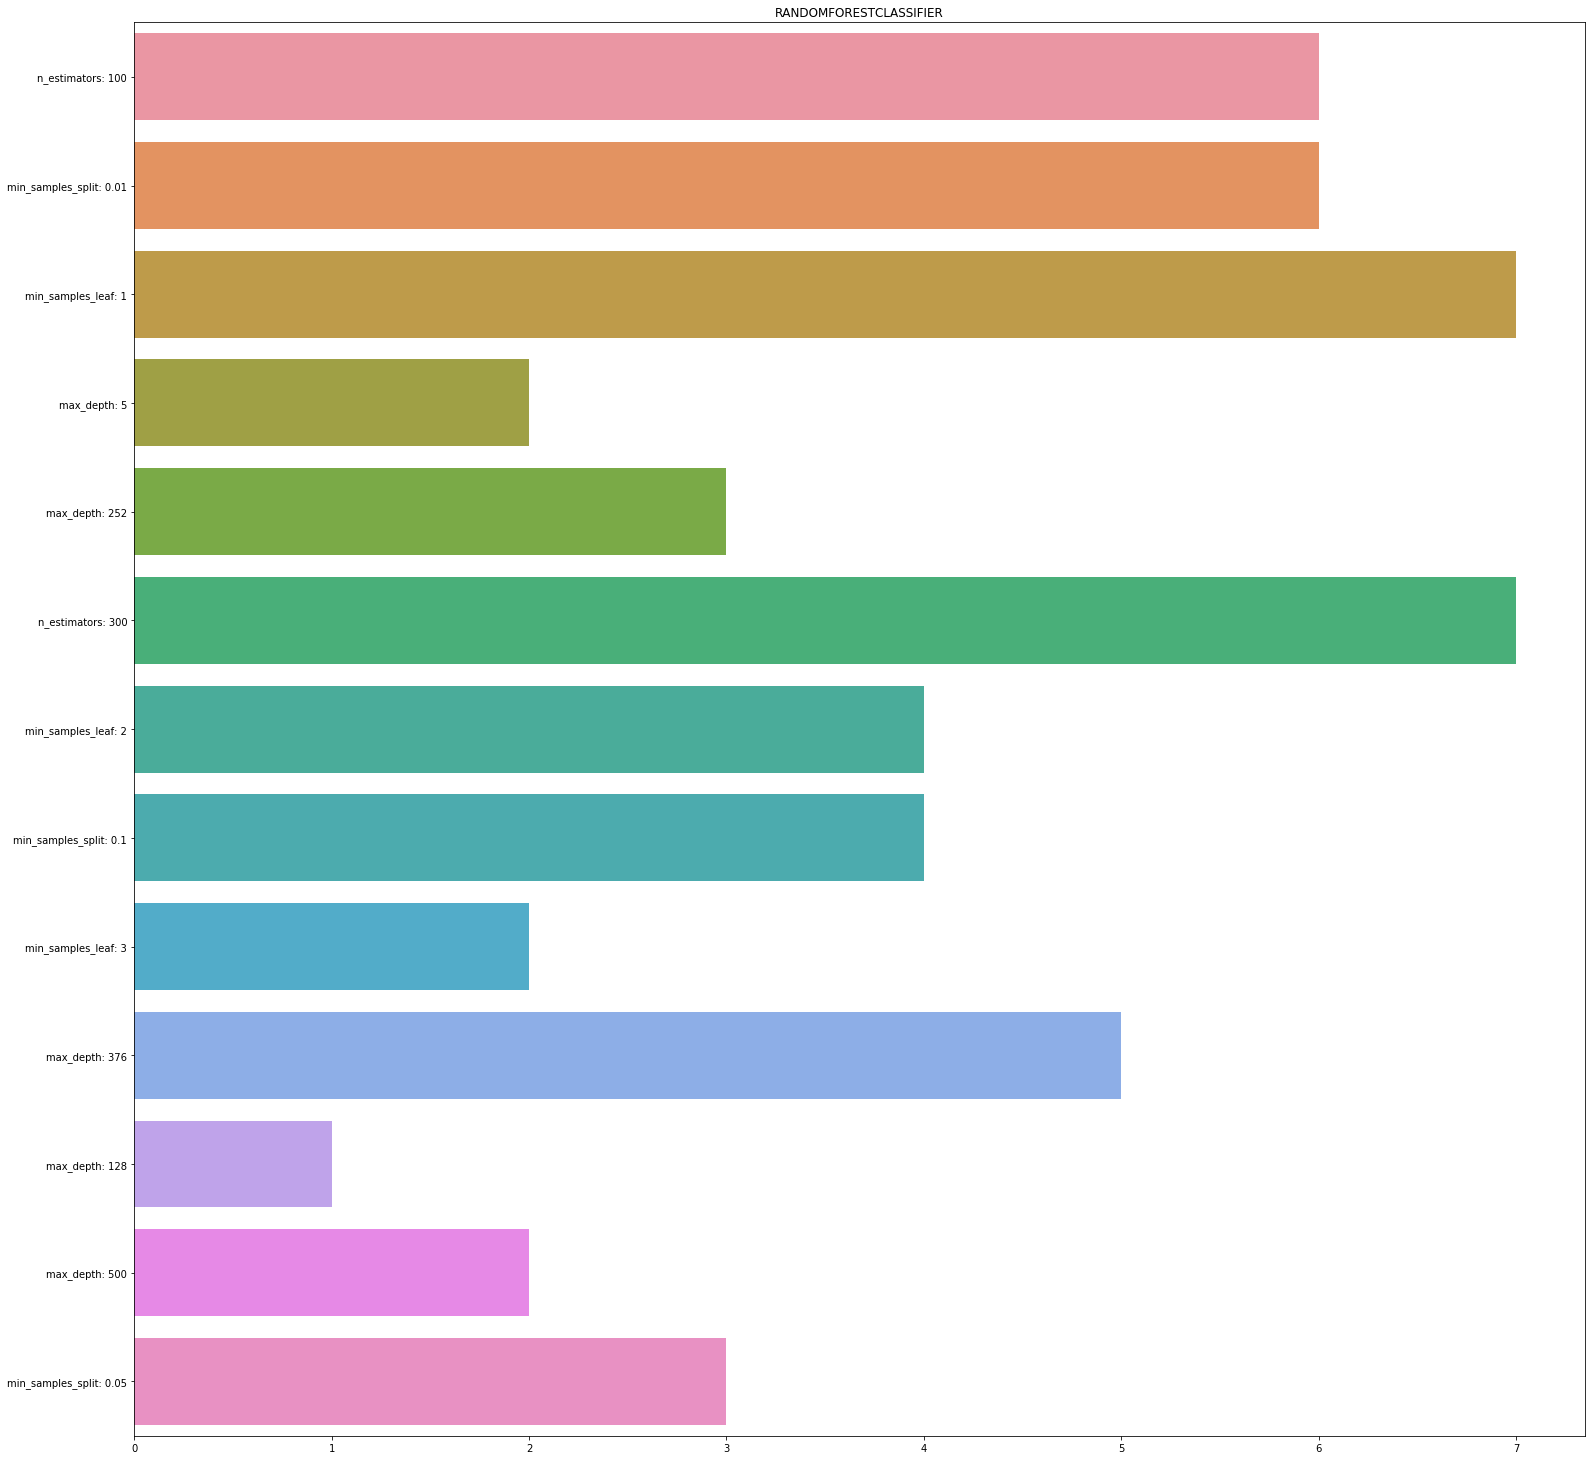

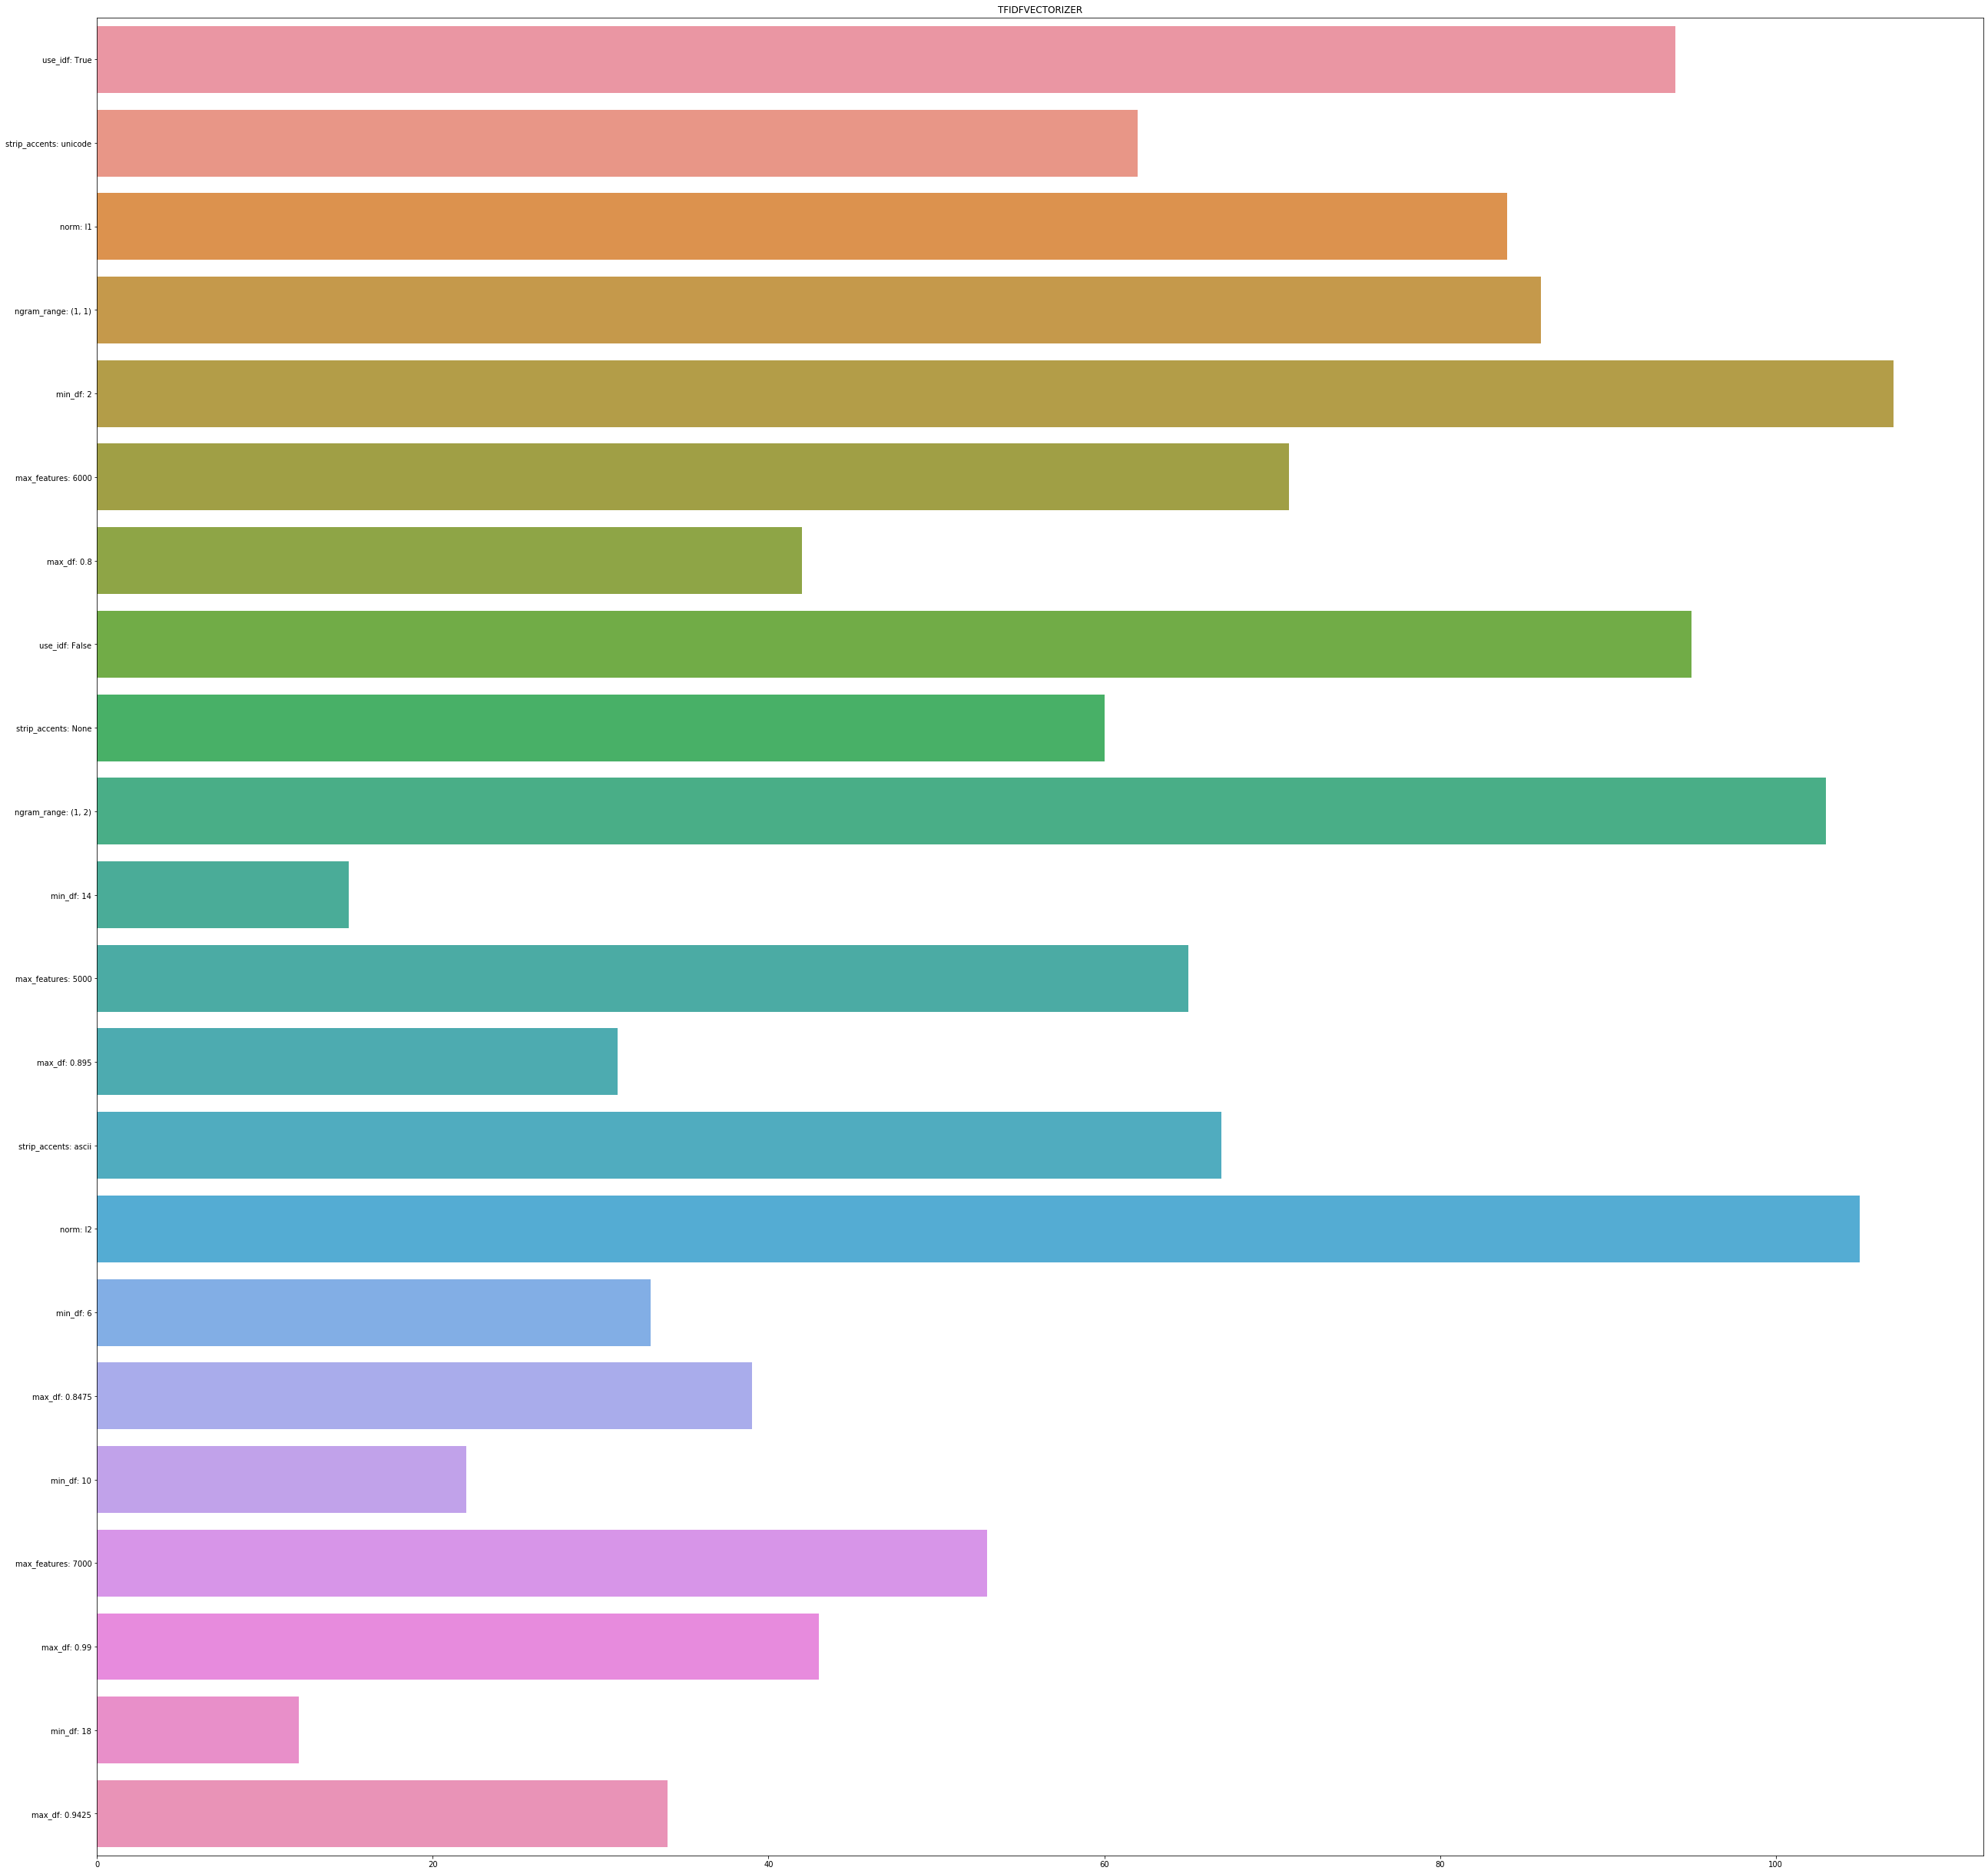

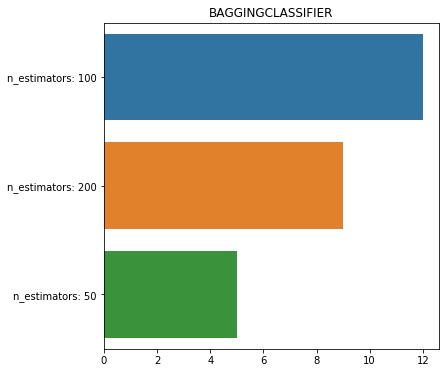

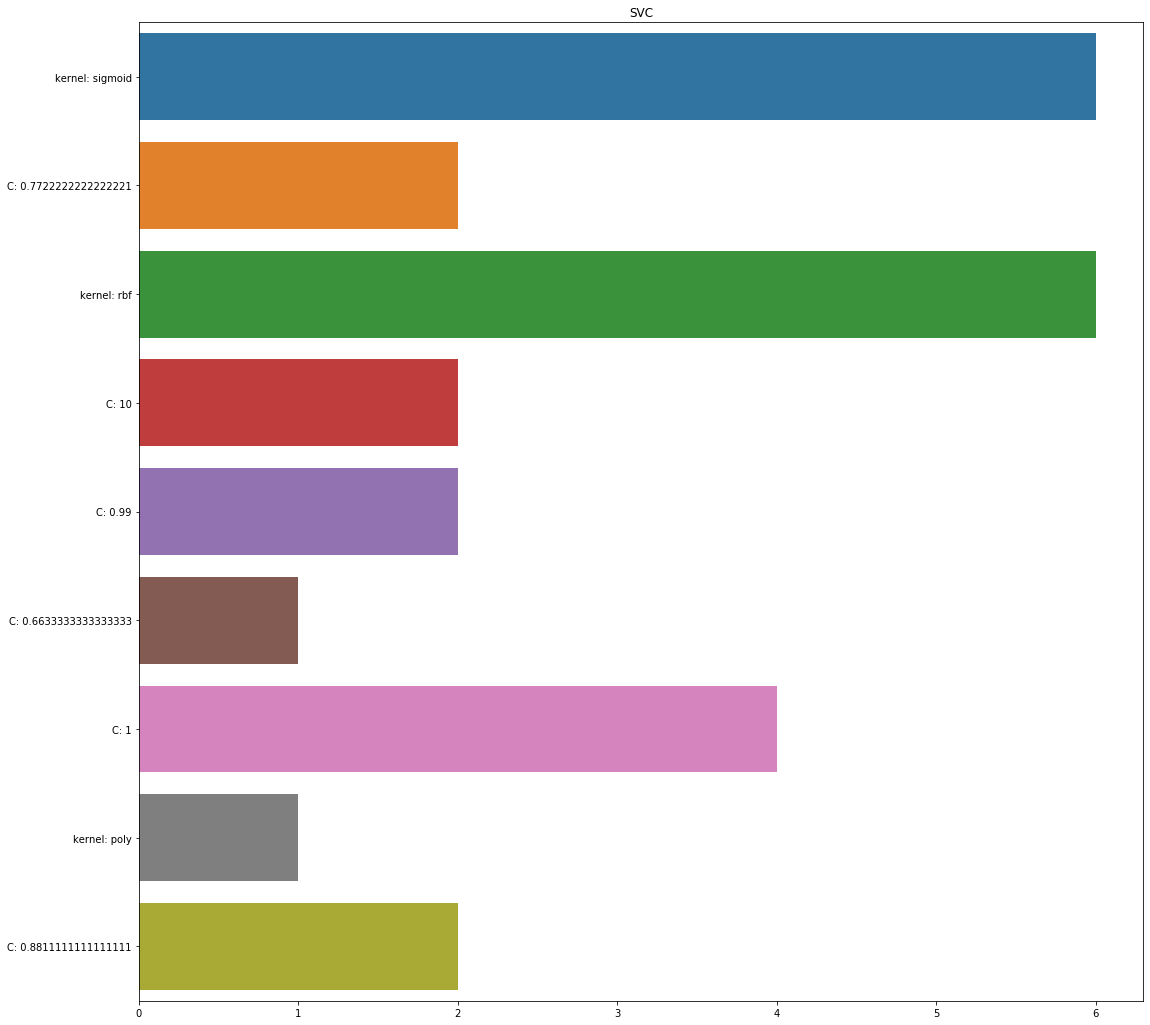

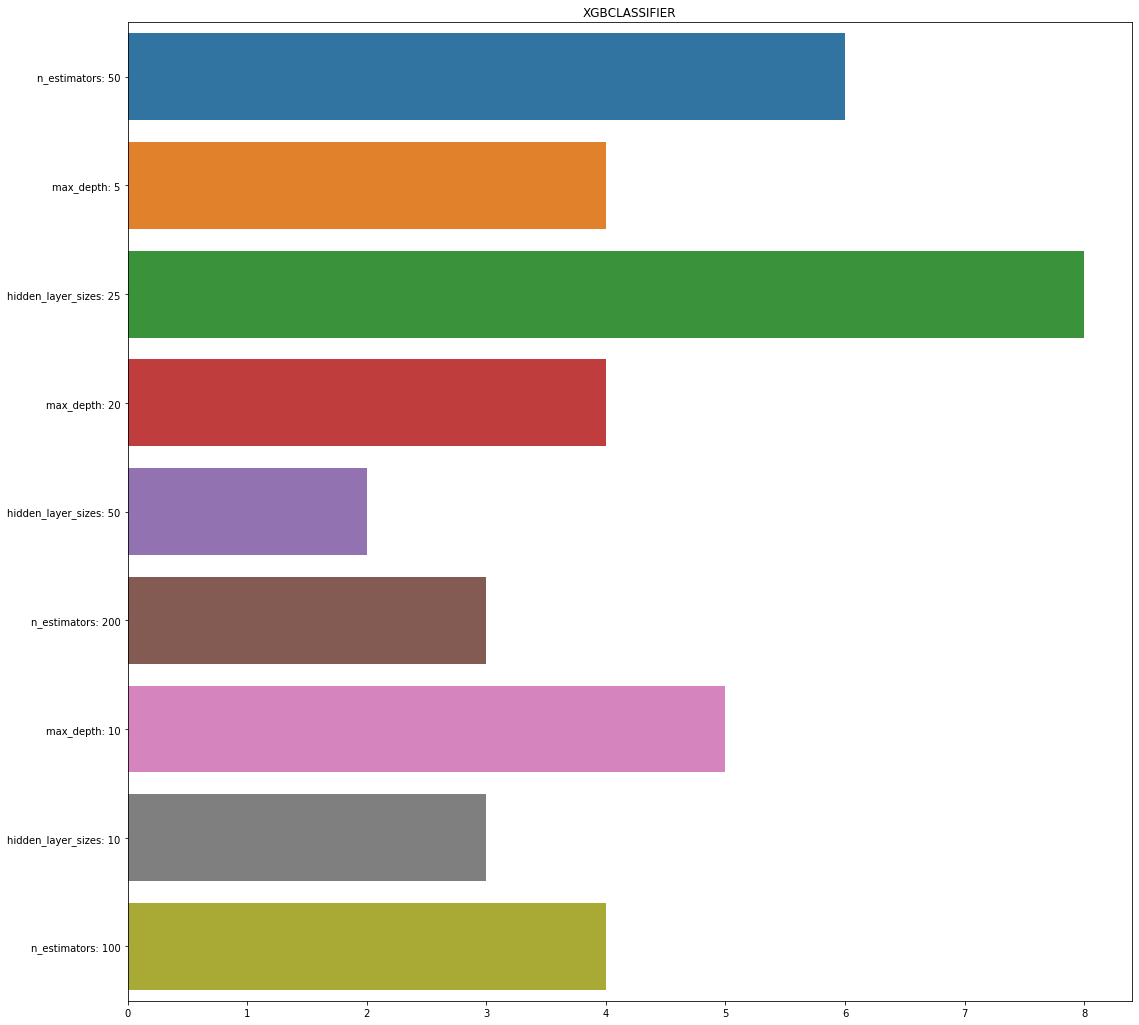

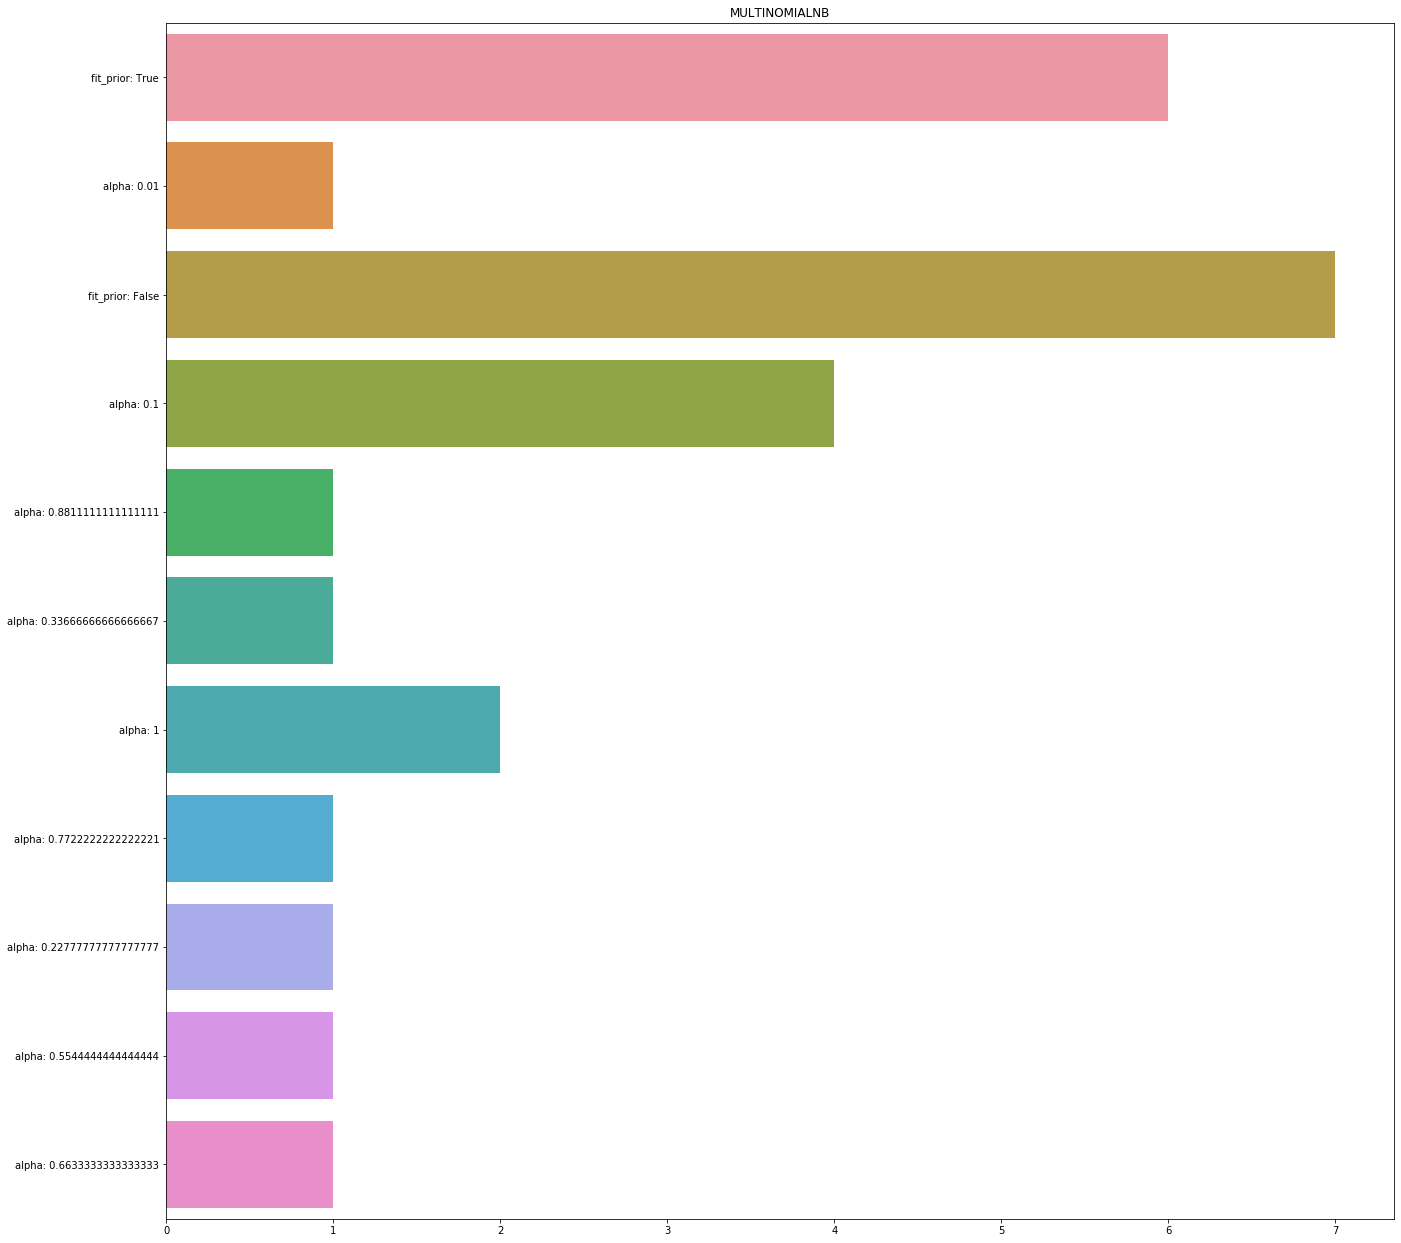

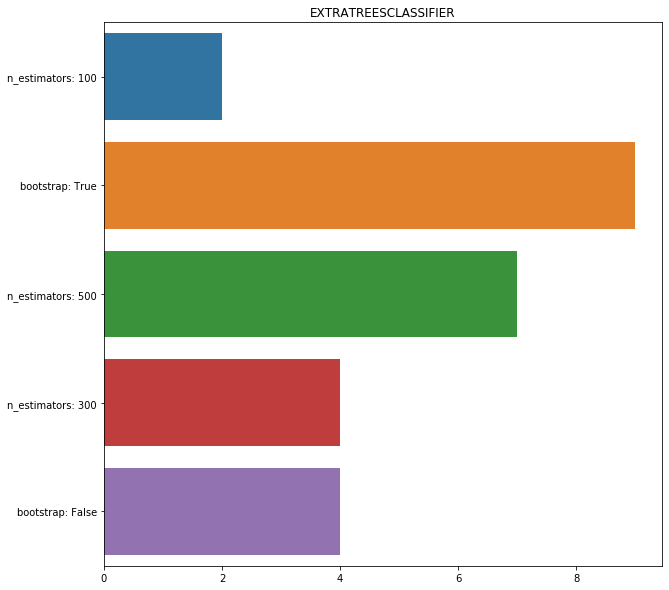

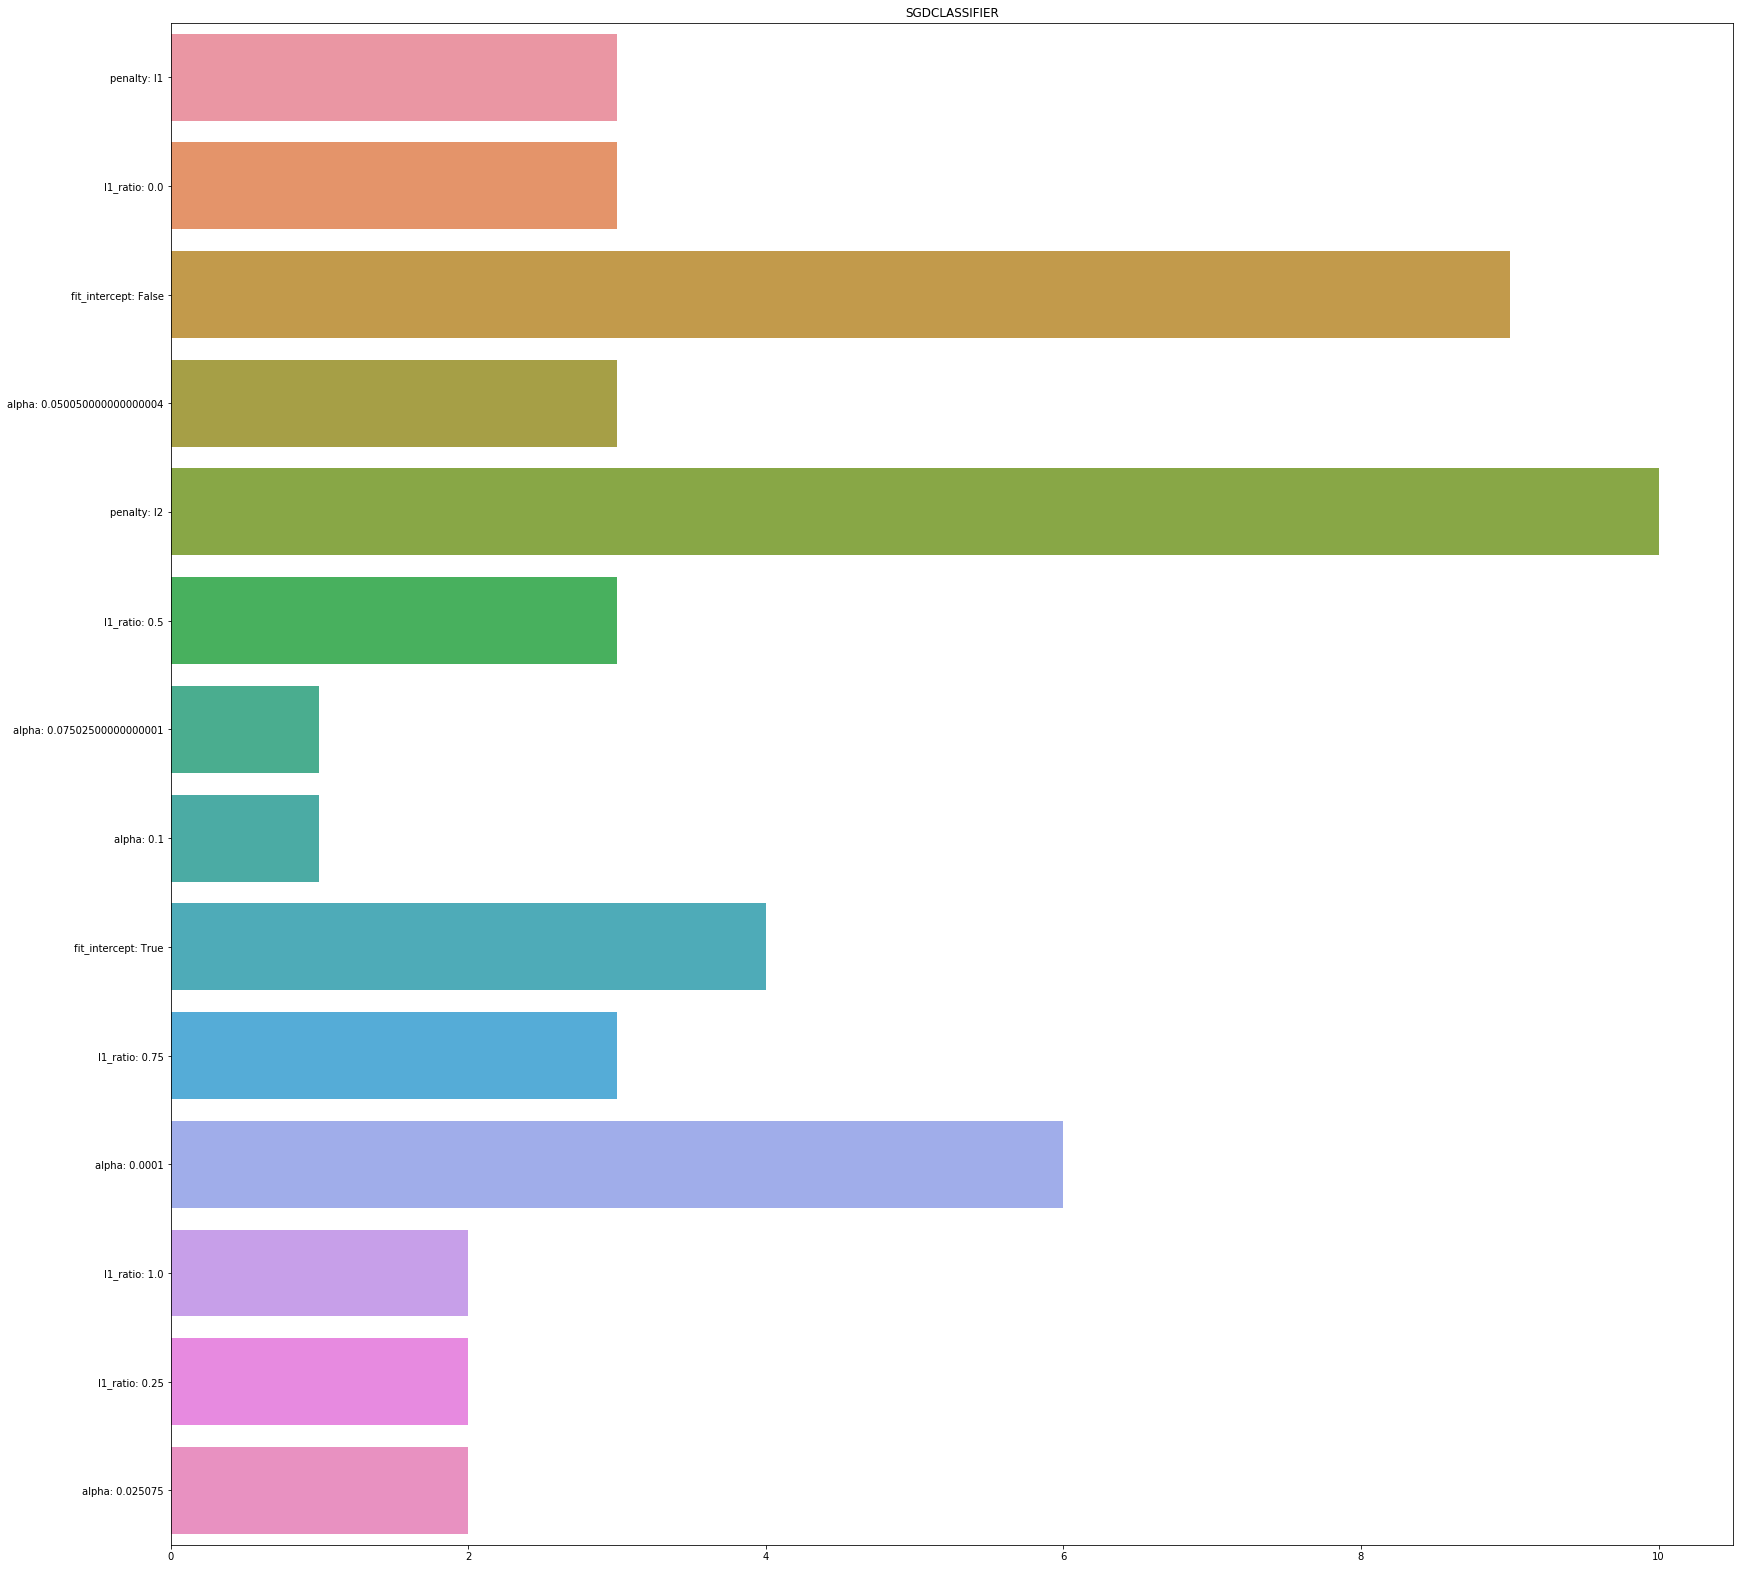

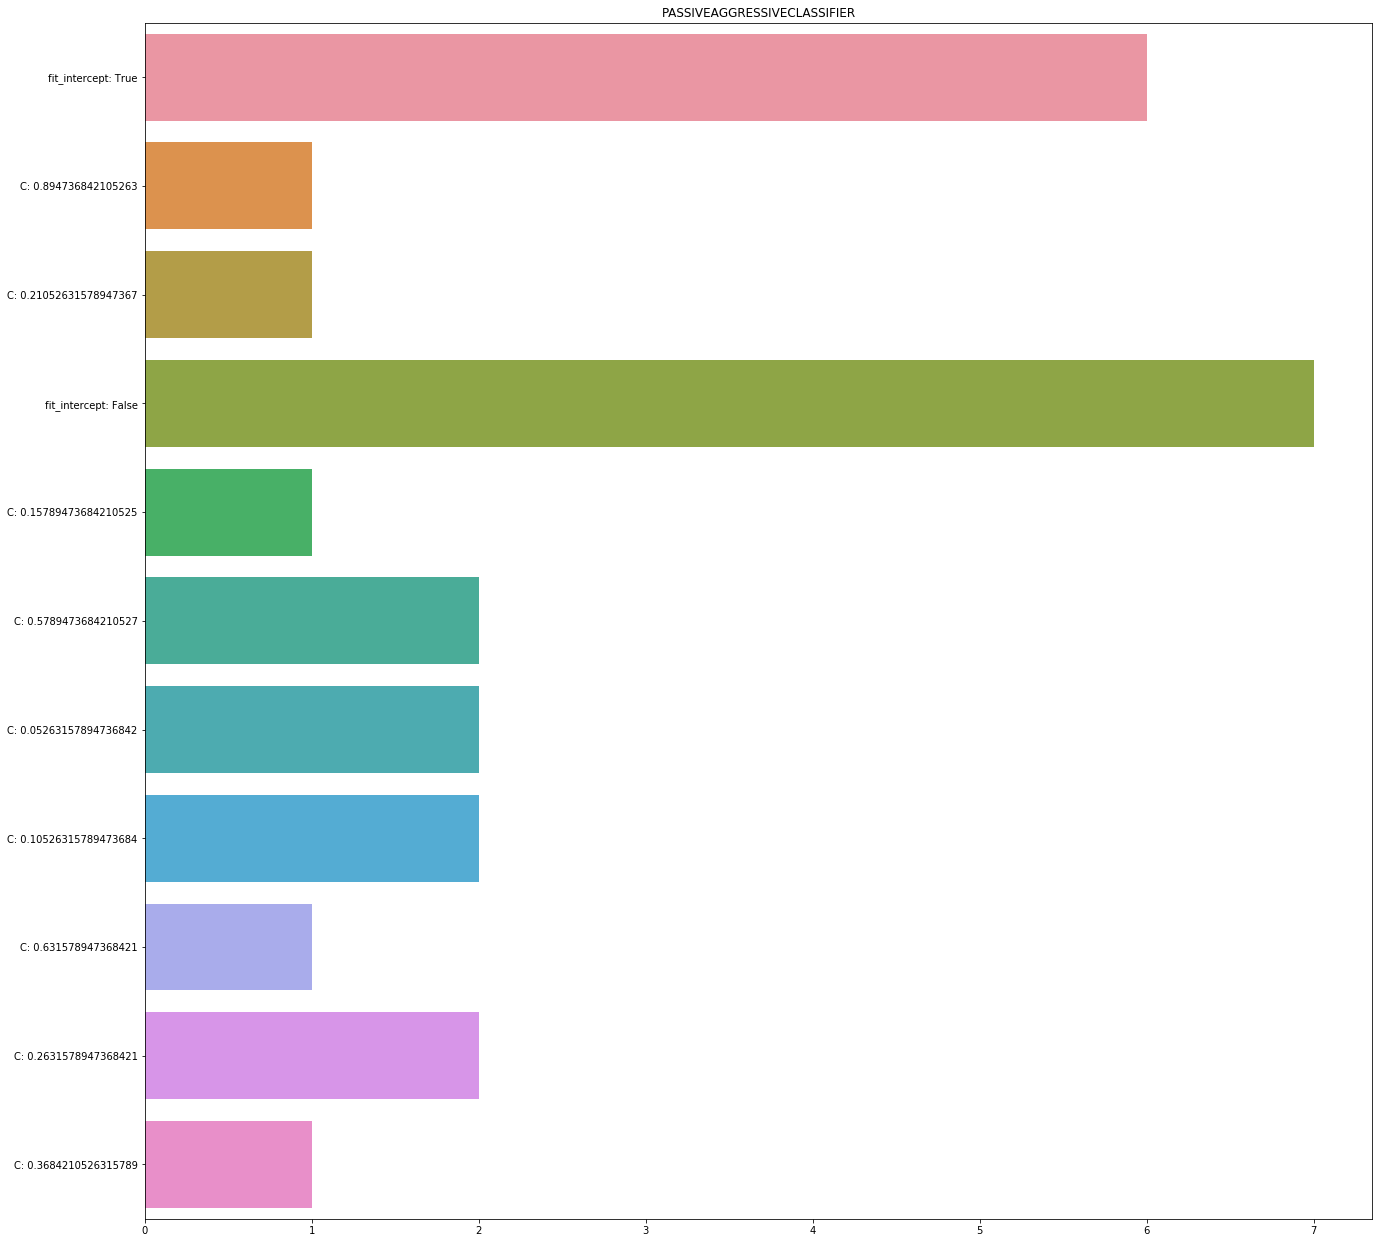

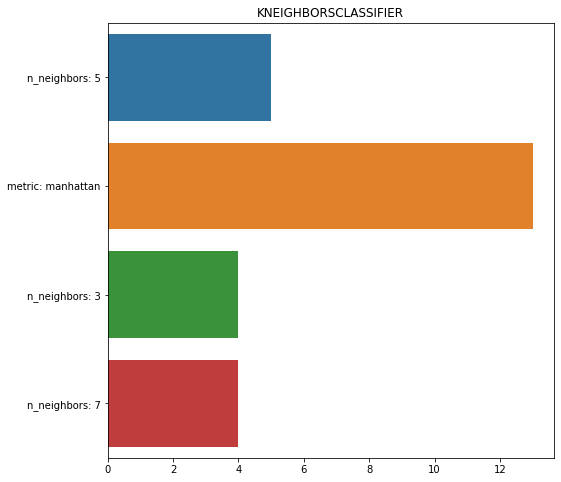

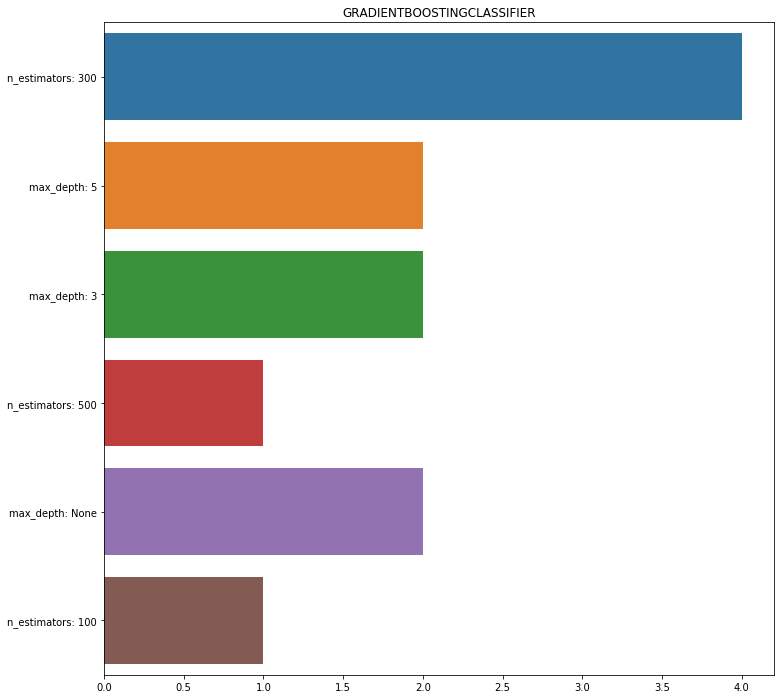

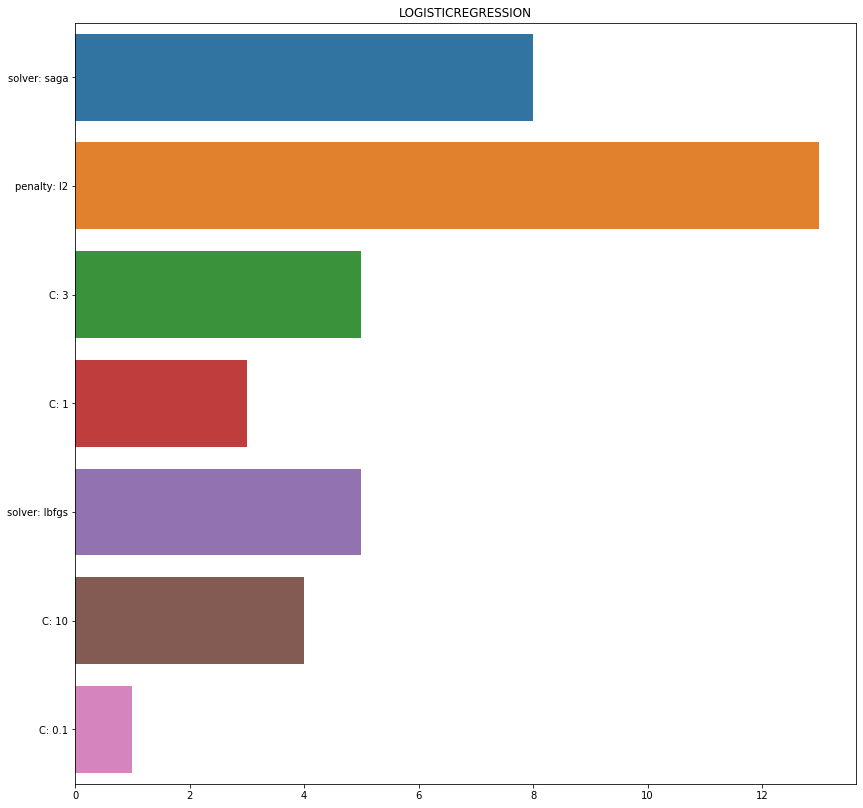

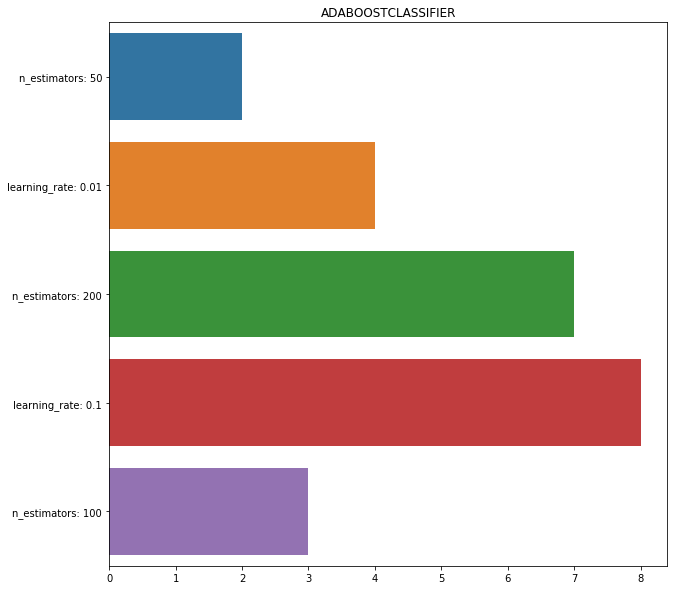

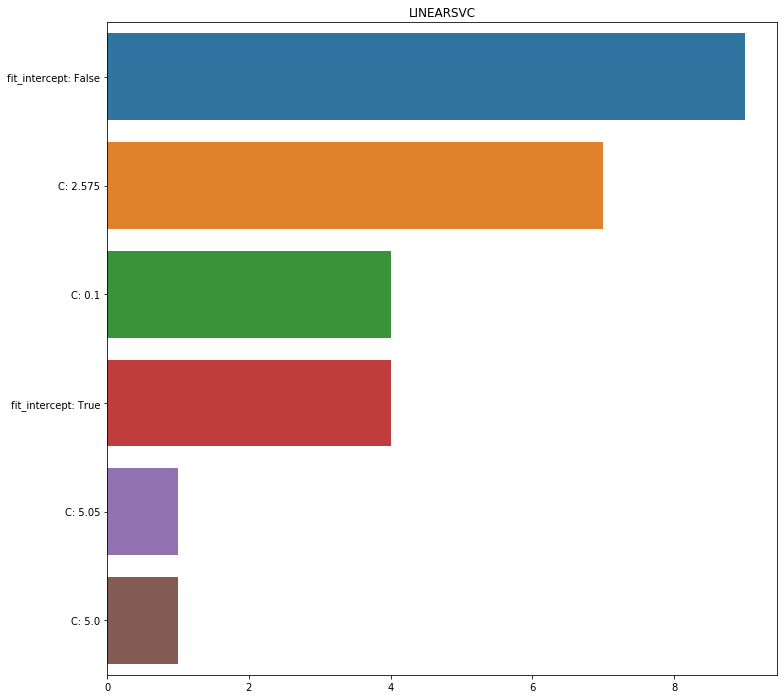

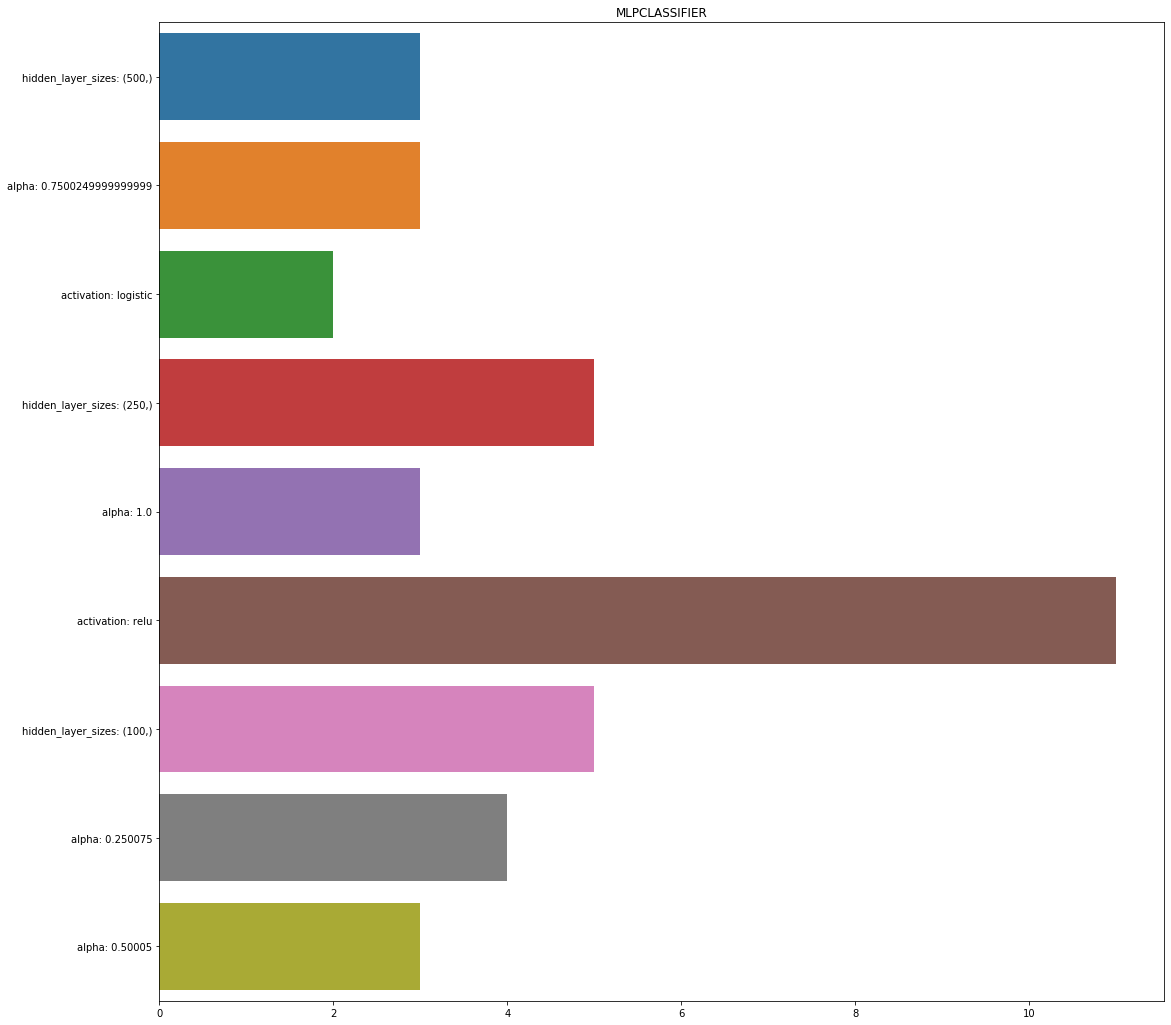

In [401]:
estimators = {estimator[0] for estimator in counted.keys()}
for estimator in estimators:
    best_params_plot(estimator)